In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [11]:
# Load the dataset
df = pd.read_csv("expanded_kerala_car_data_2025.csv")

In [12]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [17]:
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


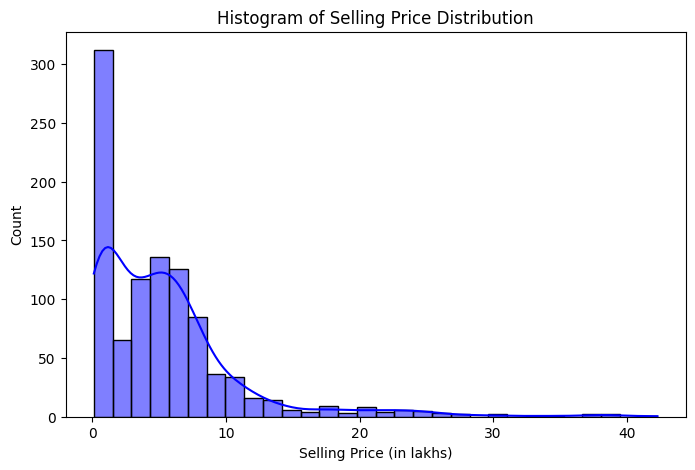

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], bins=30, kde=True, color='blue')
plt.xlabel('Selling Price (in lakhs)')
plt.ylabel('Count')
plt.title('Histogram of Selling Price Distribution')
plt.show()

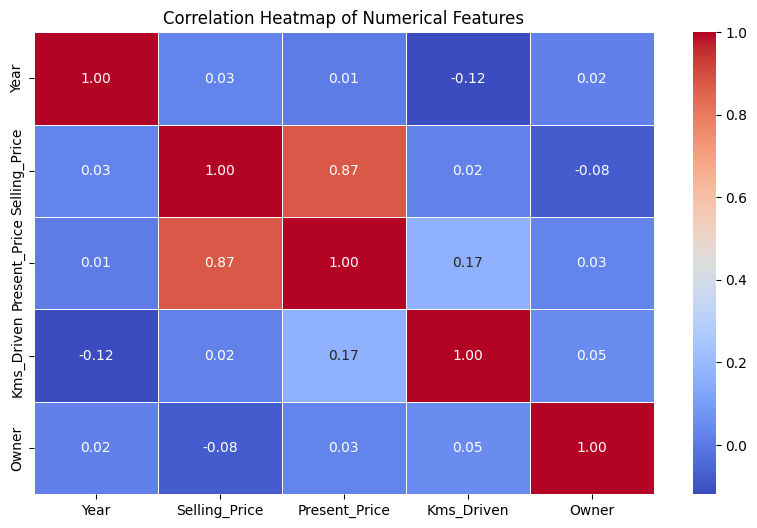

In [14]:
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

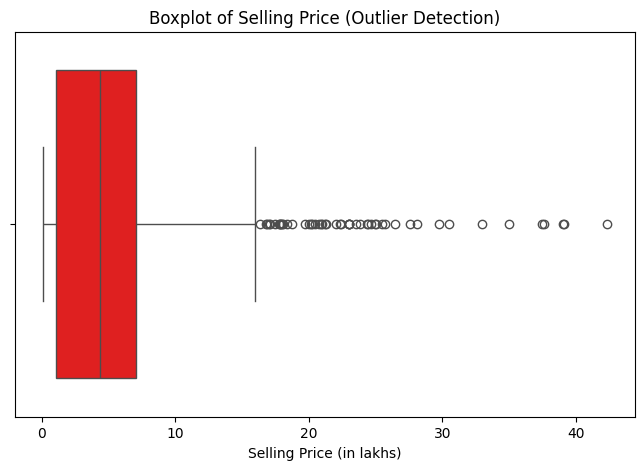

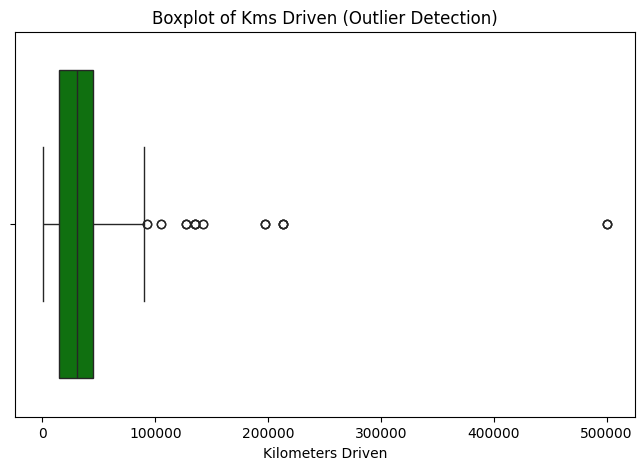

In [15]:
# Boxplot for Selling Price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Selling_Price'], color='red')
plt.title('Boxplot of Selling Price (Outlier Detection)')
plt.xlabel('Selling Price (in lakhs)')
plt.show()

# Boxplot for Kms Driven
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Kms_Driven'], color='green')
plt.title('Boxplot of Kms Driven (Outlier Detection)')
plt.xlabel('Kilometers Driven')
plt.show()

In [18]:
summary = pd.DataFrame({  
    "Column Name": df.columns,  
    "Data Type": df.dtypes.values,  
    "Missing Values": df.isnull().sum().values,  
    "Unique Values": df.nunique().values  
})  

# Display dataset summary  
print(summary)  

     Column Name Data Type  Missing Values  Unique Values
0       Car_Name    object               0             98
1           Year     int64               0             23
2  Selling_Price   float64               0            593
3  Present_Price   float64               0            625
4     Kms_Driven     int64               0            379
5      Fuel_Type    object               0              3
6    Seller_Type    object               0              2
7   Transmission    object               0              2
8          Owner     int64               0              3


C:\Users\lenovo\AppData\Local\Temp\ipykernel_28412\2963345011.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")


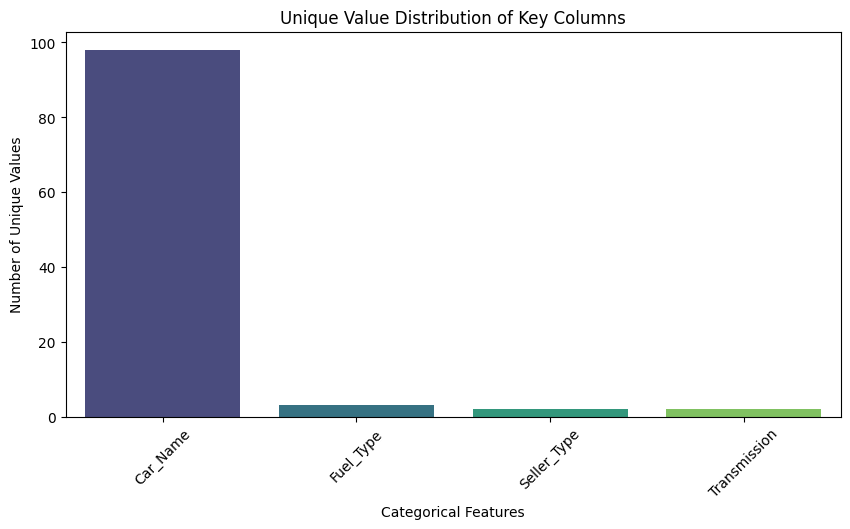

In [16]:
categorical_columns = df.select_dtypes(include=['object']).columns  

# Count unique values in each categorical column  
unique_counts = df[categorical_columns].nunique()  

# Plot unique values per categorical column  
plt.figure(figsize=(10, 5))  
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette="viridis")  
plt.xticks(rotation=45)  
plt.xlabel("Categorical Features")  
plt.ylabel("Number of Unique Values")  
plt.title("Unique Value Distribution of Key Columns")  
plt.show()  

In [ ]:
# Data Preprocessing
df.drop(['Car_Name'], axis=1, inplace=True)  # Drop irrelevant column

In [ ]:
# Convert categorical variables into numerical values
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Splitting features and target variable
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [ ]:
X

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,False,True,False,True
1,2013,9.54,43000,0,True,False,False,True
2,2017,9.85,6900,0,False,True,False,True
3,2011,4.15,5200,0,False,True,False,True
4,2014,6.87,42450,0,True,False,False,True
...,...,...,...,...,...,...,...,...
995,2017,1.67,8700,0,False,True,True,True
996,2022,13.35,47905,0,True,False,False,True
997,2022,12.28,43469,0,True,False,False,True
998,2009,8.70,40534,0,False,True,False,True


In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = np.maximum(model.predict(X_test), 0)  # Replaces negative values with zero

In [ ]:
X_test

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
521,2006,10.82,12000,0,False,True,False,True
737,2022,9.22,38202,0,True,False,False,True
740,2006,0.99,23000,0,False,True,True,True
660,2009,7.20,43000,0,False,True,False,True
411,2022,6.71,16755,1,False,True,False,True
...,...,...,...,...,...,...,...,...
408,2025,7.68,14812,1,False,True,False,True
332,2006,41.13,6000,0,True,False,False,False
208,2017,8.10,3435,0,False,True,False,True
613,2014,8.58,62000,0,False,True,False,True


In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 0.8557469999999996
Mean Squared Error: 2.7752956672999978
R^2 Score: 0.9219393826196582


In [ ]:
# Save the model
with open('car_price_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as car_price_model.pkl")

Model saved as car_price_model.pkl
